## Lab03
Class will focus on learning the probability of heads from a series of coin flips using the maximum likelihood approach. We will learn how to simulate a series of coin flips, program the loglikelihood function into R, optimize this likelihood and approximate the distribution of maximum likelihood estimates for the probability of heads using the Fisher Information Matrix. 

### Simulate a coin flip using the `rbinom` function

We will simulate a coinflip using the `rbinom` fucntion. 
Recall that the [Binomial distribution or Binom(N,$\theta$)]() assigns probabilities to the values 0,1,2,...,N. 

The probability mass function (pmf) for the Binomial distribution is
\begin{align}
    p(x|N,\theta) = \binom{N}{x} \theta^{x}(1-\theta)^{N-x}
\end{align}
and the pmf for the Bernoulli is $\theta$ when $x=1$ and $1-\theta$ when $x=0$. 
We can write this pmf in a single line like this
\begin{align}
    p(x|\theta) = \theta^{x}(1-\theta)^{1-x}
\end{align}

By setting the Binomial distribution parameter $N=1$, we have the following pmf
\begin{align}
    p(x|N=1,\theta) &= \binom{1}{x}\theta^{x}(1-\theta)^{1-x} \\ 
                    &= \theta^{x}(1-\theta)^{1-x}
\end{align}
where $\binom{1}{x}$ counts the number of ways to return 1 item (which is equal to one). 

This means we can simulate values from a $\text{Bern}(\theta)$ distribution by simulating from a $\text{Binom}(1,\theta)$ distribution.
In R, we can simulate values from a Binomial distribution using the `rbinom` function,

In [ ]:
rbinom(size=10,p=0.25,n=30)

where the input **size** corresponds to the parameter $N$, the input $p$ corresponds to $\theta$, and $n$ controls the number of values you wish to generate. 

Lets create a function that simulates $N$ coin flips with a probability $p$ of heads and probability $1-p$ of tails.

In [ ]:
simulateNflips = function(numflips,p){
  samples = rbinom(n=numflips,size=1,p=p)
  return(samples)
}

In [ ]:
simulateNflips(100,0.45)

Now that we have a convenient function, lets simulate 1,000 coin flips with a prob of 0.25 for heads and store this vector in a variable called **samples**.

In [ ]:
samples = simulateNflips(1000,0.25)

### The loglikelihood function for the Bernoulli distribution

#### For a single sample
For a single data point, if we knew the value of $\theta$ we would assign the foloowing probability
\begin{align}
    p(x|\theta) = \theta^{x}(1-\theta)^{1-x} 
\end{align}
In other words, if we saw the value $1$ we would assign that the probability $\theta$ and if we saw $0$ we would assign that value a $1-\theta$ probability of occuring. 

However, for a given data point we can view the above probability as a function of $\theta$
\begin{align}
    g(\theta) = p(x|\theta) = \theta^{x}(1-\theta)^{1-x} 
\end{align}

This function is called the likelihood. 
The log likelihood is then 

\begin{align}
    \log(g(\theta)) &= \log[ \theta^{x}(1-\theta)^{1-x} ] \\
                    &= x\log(\theta) + (1-x)\log(1-\theta)
\end{align}


#### For N samples
For $N$ data points that we represent as $x_{1},x_{2},\cdots,x_{N}$ where $x_{i}$ is a 1 or 0, the log likelihood becomes

\begin{align}
    p(x_{1},x_{2},\cdots,x_{N}|\theta) = \left[ \theta^{x_{1}}(1-\theta)^{1-x_{1}} \right] \left[ \theta^{x_{2}}(1-\theta)^{1-x_{2}} \right] \cdots \left[ \theta^{x_{N}}(1-\theta)^{1-x_{N}} \right]
\end{align}


\begin{align}
    \log \left[g(\theta)\right] &= \log \left\{ \left[ \theta^{x_{1}}(1-\theta)^{1-x_{1}} \right] \left[ \theta^{x_{2}}(1-\theta)^{1-x_{2}} \right] \cdots \left[ \theta^{x_{N}}(1-\theta)^{1-x_{N}} \right] \right \} \\
    &= \sum_{i=1}^{N} x_{i} \log(\theta) + (1-x_{i}) \log(1-\theta) \\
    &= \log(\theta) \sum_{i=1}^{N} x_{i}  + \log(1-\theta) \left(N-\sum_{i=1}^{N} x_{i}\right)  \\
\end{align}





Lets spend time implementing a function called `loglikelihood` that takes as input two variables: a single number between 0 and 1 called `theta` and a vector of 0s and 1s called `samples`.
This function will return the loglikelihood above.

In [ ]:
loglikelihood = function(theta,samples){
  N = length(samples)
  numberOfOnes  = sum(samples)
  numberOfZeros = N-numberOfOnes
  LL = numberOfOnes*log(theta) + numberOfZeros*log(1-theta)
  return(LL)
}

### Visualizing the loglikelihood function for a sample of data
We can plot the loglikelihood for values of theta from 0 to 1 by 0.01 to get a sense of where the loglikelihood is highest. Because we simulated our data `samples` using $\theta=0.25$ we expect that the loglikelihood will be highest around 0.25. 

In [ ]:
thetas = seq(0,1,0.01)
LLs = loglikelihood(thetas,samples)
plot(thetas,LLs)

### Finding the maximum of the loglikelihood using an optimization routine

To find the $\theta$ that maximizes the loglikelihood function we will use the R function called [`optimize`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/optimize).
The optimize function takes as input: a function of one variable that we wish to optimize and an interval of potential values that will maximize this function. 

First, we need to give the `optimize` function our `loglikelihood` fucntion.
But we have a problem. The loglikelihood function we created takes two inputs: $\theta$ and `samples`.
We need to create a new function (lets call it `LL`), often called a **wrapper**, that takes as input only theta and returns the loglikehood.

In [ ]:
LL = function(theta){
  return(loglikelihood(theta,samples))
}

We can now call the optimize function and input LL.
The second argument is the interval of possible values that could optimize this loglikelihood.
The possible values of $\theta$ are in the interval from 0 to 1, and so we can provide the optimize function this inverval. 
Finally, the default behavior of the optimize function is to find a minimum value, not maximum. 
We can change this behavior by providing the optimize function one optional input, maximum, that is either TRUE or FALSE.

In [ ]:
 optimize(LL, interval=c(0,1),maximum=TRUE)

The optimize function returns a new object we have not yet seen in R---a **list**.
This list contains the maximum $\theta$ value and also the loglikelihood value for this maximum $\theta$ value.

### The List (an R programming aside)

In R, a list can be used to store items of different types and reference them with a key. 
To create a list, use the [list](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/list) function and include as many R objects as you like.

For example, we can create a list called `L` that contains a a key "A" that correpsonds to a string "B" and a key "C" that corresponds to a vector. Keys need to be strings.

In [ ]:
L = list("A"="B","C" = c(1,2,3))
L

Items in the list can be accessed by naming the list and enclosing two sets of square brackets around a key. 

In [ ]:
L[["A"]]

In [ ]:
L[["C"]]

An alternative way to access a list is by using the `$` operator. 
Name the list, type a $, and then the key.

In [ ]:
L$C

We now see that the optimize function returns a list of two keys

In [ ]:
O = optimize(LL, interval=c(0,1),maximum=TRUE)
O

The first key is called "maximum" and returns the maximum theta for our log likelihood, in other words our maximum likelihood estiamtor of the parameter $\theta$. The second key returns the loglikelihood value for that maximum $\theta$. 

In [ ]:
mle = O$maximum
mle

### Variance of our MLE

Let's explore the variability in our maximum likelihood estimator (MLE) by simulating 1000 coin flips 5000 times, recording the MLE, and then plotting a histogram of the MLE values. 

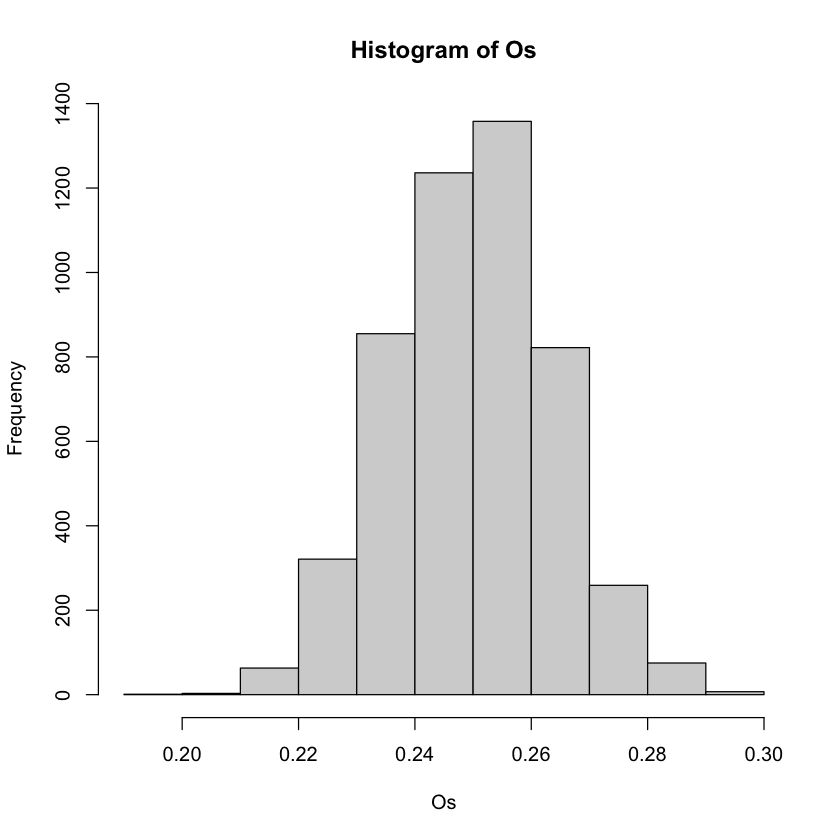

In [51]:
Os = rep(0,5000)                      # Create a vector of 5,000 zeros that will store our MLEs
for(i in 1:5000){                     # Run a loop 5,000 times 
  samples = simulateNflips(1000,0.25) # Flip 1,000 coins with a prob of heads of 0.25
  LL = function(theta){               # build a function that incorporates the data above
    return(-1*loglikelihood(theta,samples))
  }
  O = optimize(LL, interval=c(0,1))  # Optimize!
  Os[i] = O$minimum                  # Whoa, minimum? what happened here? Hint: look up three lines
}
hist(Os)                             #Plot a histogram of our 5,000 MLEs

We see that the MLE is centered near $\theta=0.25$ but does have some variability around this $\theta$ value.
The shape of this histogram likes awfully "Normal".
This is because we learned in class that the MLE has the following sampling distribution

\begin{align}
    \theta_{\text{MLE}} \sim \mathcal{N}\left( \theta , \mathcal{I}^{-1} \right)
\end{align}
where $\theta$ is the mean parameter and $\mathcal{I}/N$ the variance around the MLE. 

We learned in class that the Fisher information for the Bernoulli distribution for a single data point is

\begin{align}
    \mathcal{I}(\theta) = \frac{1}{\theta(1-\theta)}
\end{align}

and or $N$ data points is 

\begin{align}
    \mathcal{I}(\theta) = \frac{N}{\theta(1-\theta)}
\end{align}

Lets plot our empricial distribution of MLEs and also the above normal distribution to see how well they line up.

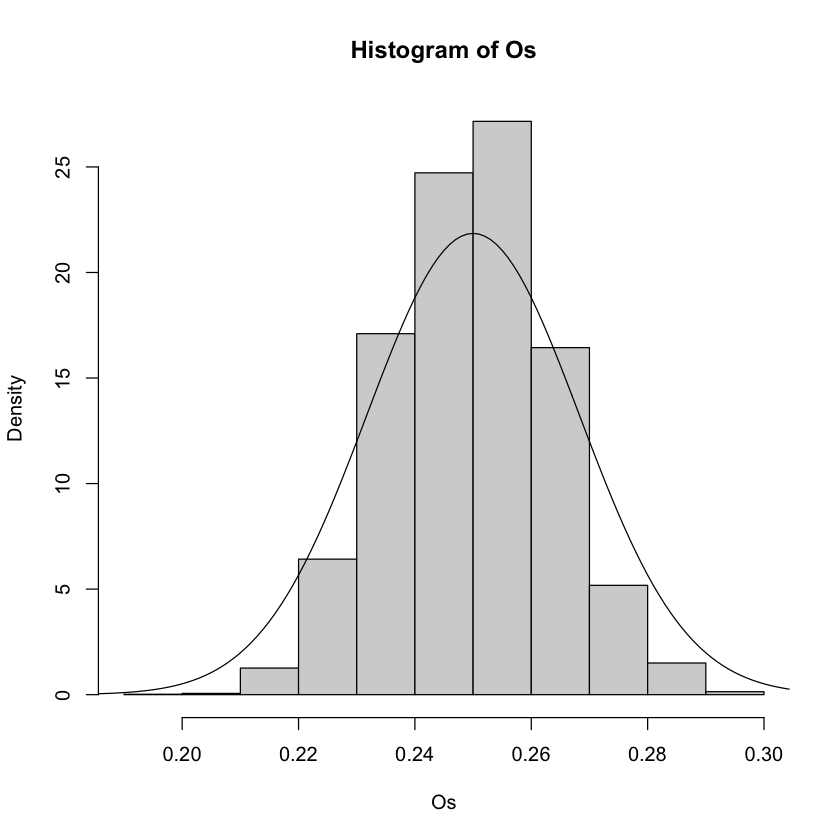

In [55]:
fisherInfo = function(MLE,samples){
  N = length(samples)
  return(N/MLE*(1-MLE)) # This is the Fisher info for N samples
}

thetas = seq(0,1,0.001)
 
# This returns the density of a Normal distribution with mean, and sd for all the x values
dens = dnorm(x = thetas, mean = 0.25, sd = sqrt(1/fisherInfo(0.25,samples)))

hist(Os,probability=TRUE) # The options probability=TRUE estimates a probability density from your histogram
lines(thetas,dens)